In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [2]:
df = pd.read_csv("./data/fcc-forum-pageviews.csv", parse_dates=True, index_col="date")
print(df)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


# Clean data

In [3]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
print(df)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


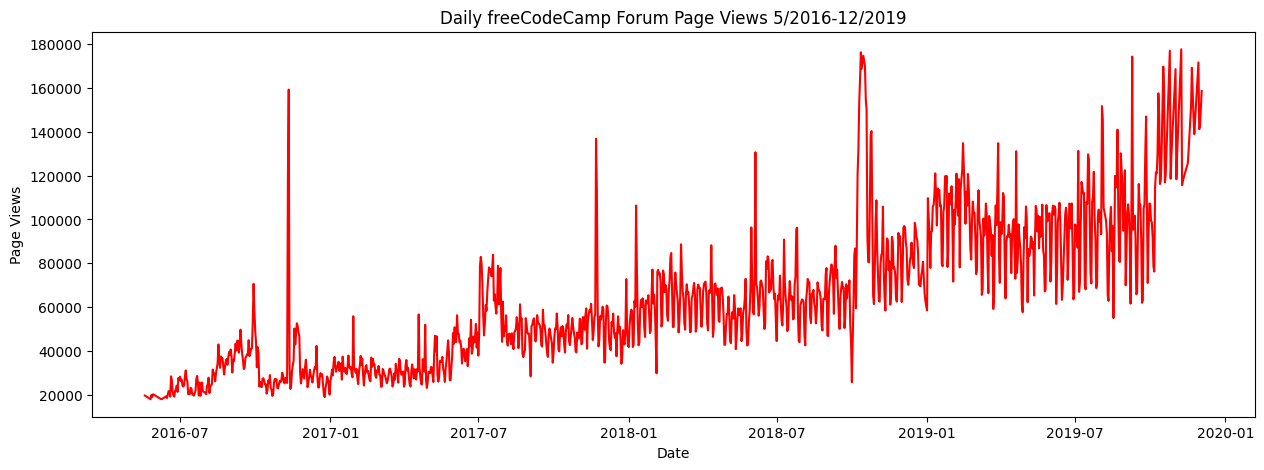

In [4]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()

draw_line_plot()

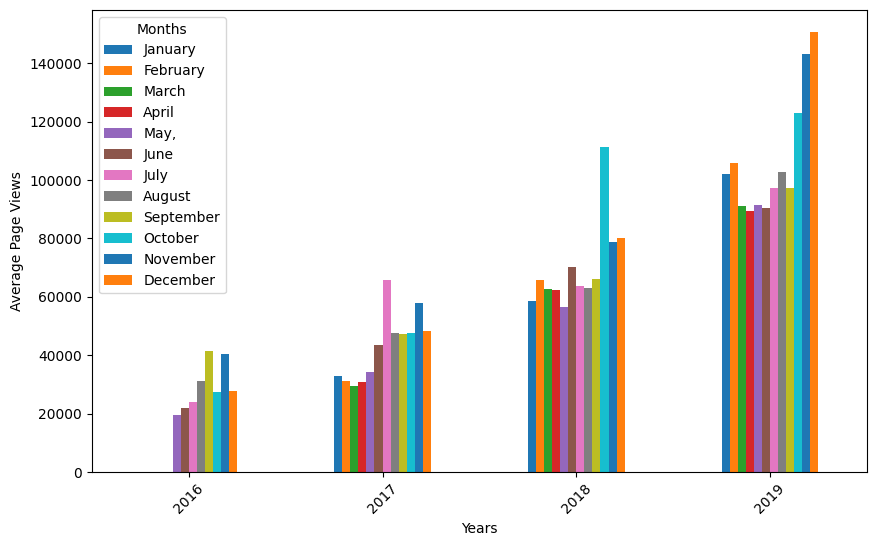

In [5]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    df_bar.columns = ['January', 'February', 'March', 'April', 'May,', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(10, 6)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months of the year.')
    plt.xticks(rotation=45)
    plt.show()

draw_bar_plot()


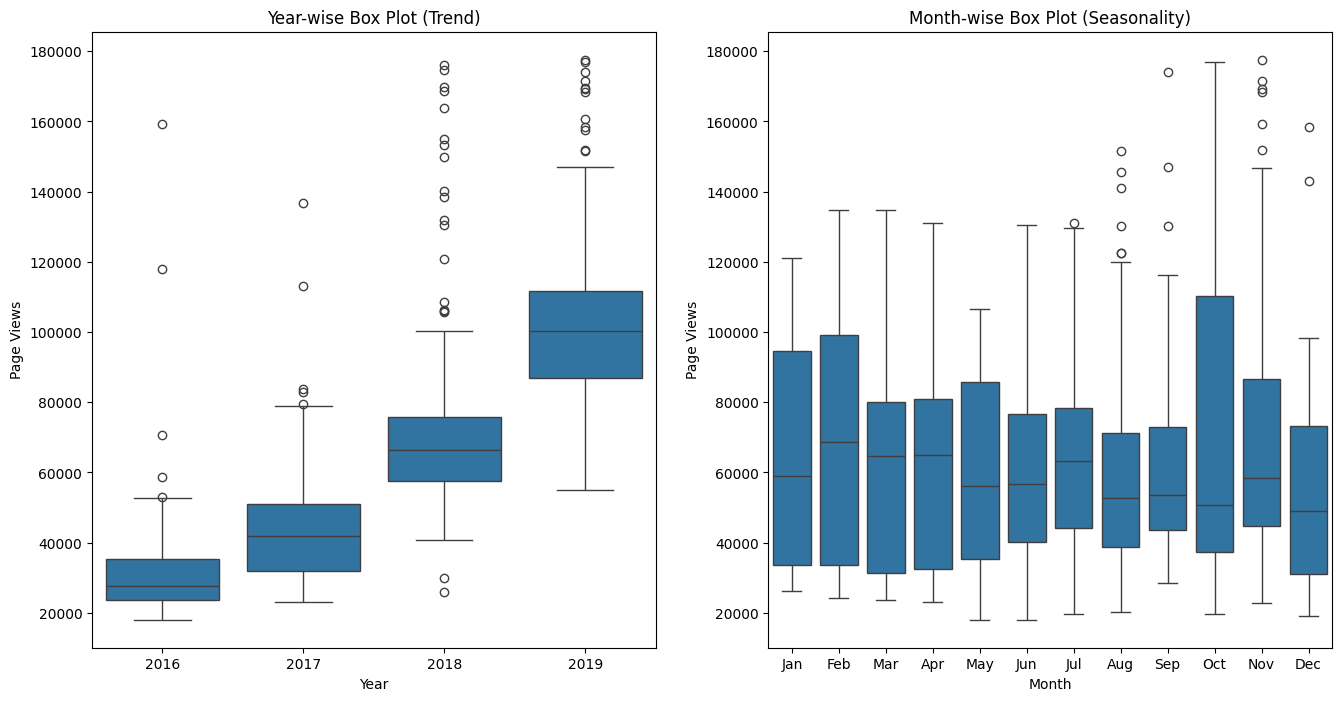

In [20]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['month_num'] = [d.month for d in df_box.date]
    df_box = df_box.sort_values('month_num')

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1), ax1.set_title('Year-wise Box Plot (Trend)'), ax1.set_xlabel('Year'), ax1.set_ylabel('Page Views')
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2), ax2.set_title('Month-wise Box Plot (Seasonality)'), ax2.set_xlabel('Month'), ax2.set_ylabel('Page Views')
    plt.show()

draw_box_plot()
